<a href="https://colab.research.google.com/github/towfeeqf/DL-practice-problems/blob/master/fashion_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [0]:
print(tf.__version__)

1.14.0


In [0]:
# load the fashion-mnist re-shuffled train data and test data
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print("x_train shape: ",x_train.shape,"y_train shape: ",y_train.shape)


x_train shape:  (60000, 28, 28) y_train shape:  (60000,)


In [0]:
#visualize the 
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)

# Print the number of training and test datasets

print(x_train.shape[0],'train set')
print(x_test.shape[0],'test set')

#print(x_train.shape[0],'train set')
#print(x_test.shape[0],'test set')

60000 train set
10000 test set


In [0]:
#Define the labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

#fashion_mnist_labels=[ ["T-shirt/top","Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] ]

In [0]:
fashion_mnist_labels[0]

'T-shirt/top'

In [0]:
print(len(x_train),len(y_train))
print()

60000 60000



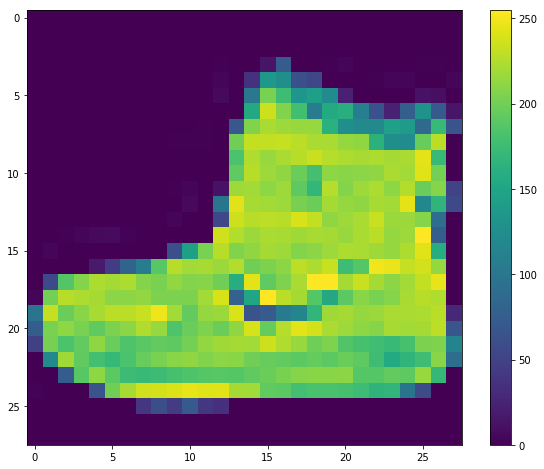

In [0]:
plt.figure(figsize=(10,8))
plt.imshow(x_train[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

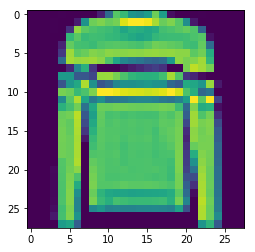

In [0]:
plt.imshow(x_train[5])
plt.show()

In [0]:
print(y_train)   # y_train is labels numbered between 0 and 9
print(y_train[5])
print(y_train.shape)


[9 0 0 ... 3 0 5]
2
(60000,)


2
Pullover


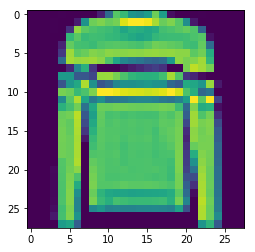

y=2--Pullover


In [0]:

# pickany image index from 0 to 59999
img_index= 5
# y_train contains labels, ranging fro 0 to 9

label_index=y_train[img_index]

print(label_index)

print(fashion_mnist_labels[label_index])
plt.imshow(x_train[img_index])
plt.show()

print("y="+str(label_index)+"--"+fashion_mnist_labels[label_index])

In [0]:
# print the labels for example 2 pullover
print("y= " + str(label_index) + " " +fashion_mnist_labels[label_index] )

y= 2 Pullover


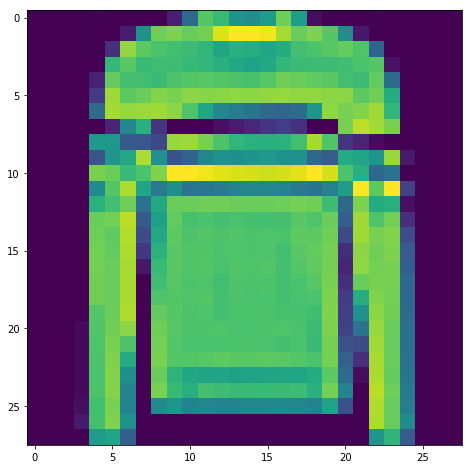

In [0]:
# # Show one of the images from the training dataset
plt.figure(figsize=(10,8))
plt.imshow(x_train[img_index])
plt.show()

In [0]:
# Data Normalization
# Normalize the data dimensions so that they are of approximately the same scale 

In [0]:
x_train1 = x_train / 255.0   # instead of having int values we will have float values_images
x_test1 = x_test / 255.0

In [0]:
# second way of getting float values

x_train=x_train.astype('float32')/255
x_test =x_test.astype('float32')/255

In [0]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


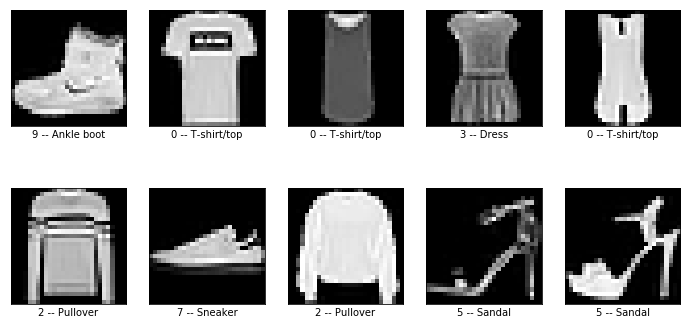

In [0]:
# visualize the first few images
plt.figure(figsize=(12,6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap="gray")
  plt.xlabel(str(y_train[i])+" -- "+fashion_mnist_labels[y_train[i]])


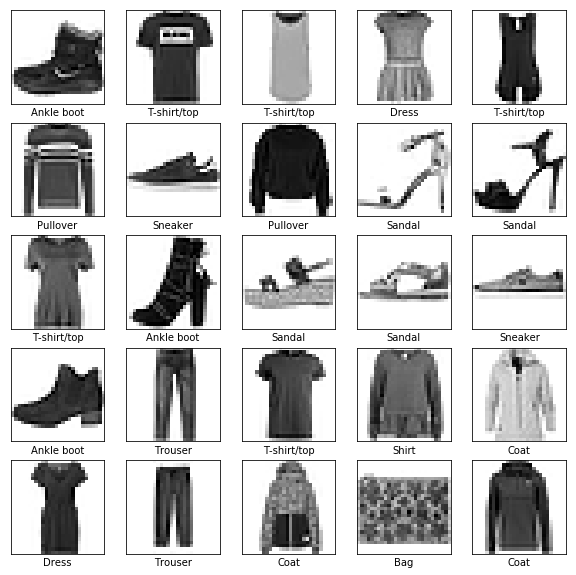

In [0]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(fashion_mnist_labels[y_train[i]])
  


In [0]:

# Split the data into train/validation/test data sets

# training data : used for training the model
# validation data : used for tuning and evaluating the model
# test data : used to test the model after the model has gone through initial vetting by the validation set

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# from training data put 55000 for training and 5000 for validating
# from the label data put 5000 for training and remaining for validating 

In [0]:
x_train.shape

(55000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_valid.shape

(5000, 28, 28)

In [0]:
y_train.shape

(55000,)

In [0]:
y_valid.shape

(5000,)

In [0]:
#reshape input data input data from (28,28) to (28,28,1)
w, h =28, 28

In [0]:
x_train=x_train.reshape(x_train.shape[0],w,h,1)
x_valid=x_valid.reshape(x_valid.shape[0],w,h,1)
x_test=x_test.reshape(x_test.shape[0],w,h,1)

In [0]:
#one-hot encode the labels

y_train=tf.keras.utils.to_categorical(y_train,10)
y_valid=tf.keras.utils.to_categorical(y_valid,10)
y_test=tf.keras.utils.to_categorical(y_test,10)



In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_train.shape

(55000, 10)

In [0]:
#print training set shape
print("x_train shape:",x_train.shape, "y_train.shape: ",y_train.shape )

x_train shape: (55000, 28, 28, 1) y_train.shape:  (55000, 10)


In [0]:
#print the number of training, validation, and test set

print(x_train.shape[0],": train set")
print(x_valid.shape[0],": valid set")
print(x_test.shape[0], ": test set")

55000 : train set
5000 : valid set
10000 : test set


In [0]:
x_train[1].shape

(28, 28, 1)

#Create the model architecture

There are two APIs for defining a model in keras
 Sequential model API
 Functional model API
 In this notebook, we use sequential model . In defining the model,we use some of these API's

 Conv2D() - create a convolutional layer
 
 Pooling() -  create a pooling layer
 
 Dropout() -  apply drop out




In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.layers import Flatten


Using TensorFlow backend.


In [0]:
#create model
#model1 = Sequential()

# must define the input shape in the first layer of the neural network
# add convolution layer, maxpooling, flatten



model2 = Sequential()
model2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Flatten())


model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
model2.summary()

#model2.fit(x_train, y_train, epochs=10, validation_split=0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
'''

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))


model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())




model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

'''


In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer2 = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=1)

In [0]:


model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

#model2.fit(x_train, y_train, epochs=10, validation_split=0.1,validation_data=(x_valid,y_valid))


W0808 07:16:46.892466 140443559323520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0808 07:16:46.948540 140443559323520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 49500 samples, validate on 5500 samples
Epoch 1/10
49500/49500 [==============================] - 37s 757us/step - loss: 0.4553 - acc: 0.8403 - val_loss: 0.3336 - val_acc: 0.8813
Epoch 2/10
49500/49500 [==============================] - 36s 737us/step - loss: 0.3235 - acc: 0.8857 - val_loss: 0.3128 - val_acc: 0.8893
Epoch 3/10
49500/49500 [==============================] - 37s 745us/step - loss: 0.2872 - acc: 0.8992 - val_loss: 0.2970 - val_acc: 0.8973
Epoch 4/10
49500/49500 [==============================] - 37s 746us/step - loss: 0.2646 - acc: 0.9065 - val_loss: 0.2748 - val_acc: 0.9025
Epoch 5/10
49500/49500 [==============================] - 36s 734us/step - loss: 0.2478 - acc: 0.9117 - val_loss: 0.2818 - val_acc: 0.8982
Epoch 6/10
49500/49500 [==============================] - 36s 730us/step - loss: 0.2330 - acc: 0.9160 - val_loss: 0.2737 - val_acc: 0.9036
Epoch 7/10
49500/49500 [==============================] - 36s 722us/step - loss: 0.2213 - acc: 0.9209 - val_loss: 0.2

In [0]:
model3=Sequential()

model3.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))


model3.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(256,activation= 'relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10,activation='softmax'))

model3.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
__________

In [0]:
# compile the model

# configure th learnig process with compile() api before training the model. It reveives three arguments

# An optimizer
# a loss function
# a list of metrics


In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Train the model

# Now lets train the modelusing fit() API

# We use the modelcheckpoint to save the model after each epoch.
# Set 'save_best_only=True' to save only when the validation accuracy improves

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=1)

In [0]:
model3.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_valid,y_valid),callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.6162 - acc: 0.7720 - val_loss: 0.3767 - val_acc: 0.8654

Epoch 00001: val_loss improved from inf to 0.37672, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.4236 - acc: 0.8465 - val_loss: 0.3277 - val_acc: 0.8834

Epoch 00002: val_loss improved from 0.37672 to 0.32766, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 79s 1ms/step - loss: 0.3749 - acc: 0.8639 - val_loss: 0.2866 - val_acc: 0.8978

Epoch 00003: val_loss improved from 0.32766 to 0.28657, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 80s 1ms/step - loss: 0.3417 - acc: 0.8757 - val_loss: 0.2781 - val_acc: 0.8954

Epoch 00004: val_loss improved from 0.28657 to 0.27809, saving model to model.weights.best.hdf5
Epoch 5/10
55000/55

In [0]:
# Load the weights with the best validation accuracy
model3.load_weights('model.weights.best.hdf5')

In [0]:
#Test Accuracy 
# evaluate the model on the test set

score3=model3.evaluate(x_test,y_test,verbose=0)
# Print test accuracy
print('\n', 'model3 Test accuracy:', score3[1])


 model3 Test accuracy: 0.9096


In [0]:
#Test Accuracy 
# evaluate the model on the test set

score2=model2.evaluate(x_test,y_test,verbose=0)
# Print test accuracy
print('\n', ' model2 Test accuracy:', score2[1])


  model2 Test accuracy: 0.8938


In [0]:
score

[0.24423898253440857, 0.9096]

In [0]:
# visualize te predictions

y_hat = model3.predict(x_test)

In [0]:
y_hat.shape

(10000, 10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
x_test.shape[0]

10000

In [0]:
# random number list
x_test_10= np.random.choice(x_test.shape[0],size=10,replace=False)
x_test_10

array([5685, 1537, 9794,  200,  687, 4076, 7089, 4411, 4155, 4435])

In [0]:
y_hat[x_test_10]

array([[1.2250728e-08, 8.4331417e-11, 4.3632001e-10, 1.2820947e-10,
        3.9016326e-10, 5.7315934e-01, 4.7958876e-10, 9.8438599e-05,
        1.2494139e-08, 4.2674214e-01],
       [9.4774645e-05, 1.2189162e-05, 1.1913910e-05, 2.6981718e-06,
        4.1534145e-06, 6.2563740e-02, 8.1413500e-06, 3.5981117e-03,
        1.9126417e-05, 9.3368512e-01],
       [6.4488255e-08, 9.9998939e-01, 4.8485639e-08, 6.3544934e-07,
        9.7915208e-06, 4.1155288e-11, 4.8662969e-08, 1.3280731e-14,
        1.4810226e-07, 1.4952918e-12],
       [1.9907186e-07, 9.9999881e-01, 5.0075560e-10, 7.8831516e-07,
        1.8509603e-07, 2.6442808e-12, 1.6072704e-08, 2.1351099e-13,
        6.5163025e-10, 4.3909581e-13],
       [3.3980069e-10, 7.9804940e-10, 4.8947145e-11, 2.8369556e-09,
        7.2659409e-12, 1.6139218e-04, 3.7834800e-12, 1.0255380e-05,
        2.6696406e-10, 9.9982834e-01],
       [6.4689933e-09, 7.7817447e-11, 7.9083842e-09, 1.1344020e-12,
        1.5084053e-10, 9.9860638e-01, 3.3729389e-10, 1.37

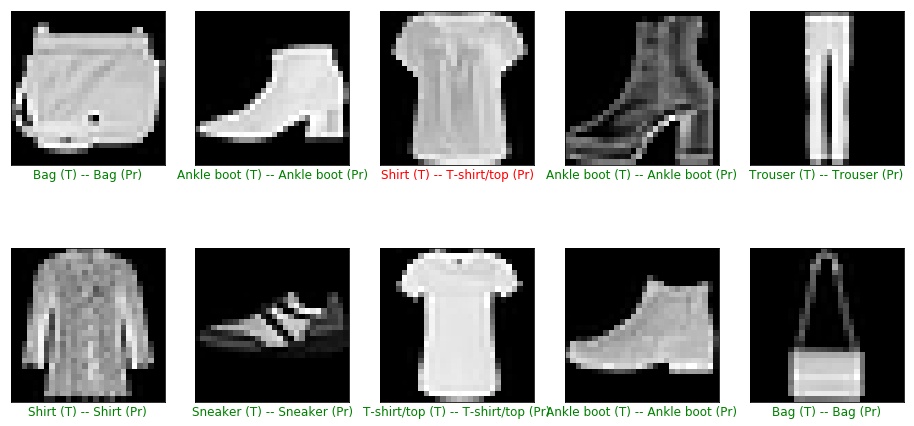

In [174]:

# random number list
x_test_10= np.random.choice(x_test.shape[0],size=10,replace=False)
#print(x_test_10)

plt.figure(figsize=(16,8))

for i, index in enumerate(x_test_10,start=0):
  #print(item)
  plt.subplot(2,5,i+1,xticks=[],yticks=[])
  plt.imshow(np.squeeze(x_test[index]),cmap='gray')  # np.squeeze is used to remove single diimensionality in an array
  
  #print(np.argmax(y_hat[index])) # argmax returns index of the 
  predict_index = np.argmax(y_hat[index]) 
  true_index = np.argmax(y_test[index])
  
  text_color ="green" if predict_index==true_index else "red"
        
   
  # set the title for each image --- T : True index , Pr : Precited
  plt.xlabel(str(fashion_mnist_labels[true_index] + " (T) -- "+fashion_mnist_labels[predict_index])+" (Pr)",color=text_color,fontsize=12)
   